## Template Matching Ansatz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from skimage import io
from scipy.signal import find_peaks
from scipy.signal import correlate2d
from scipy.ndimage import median_filter, gaussian_filter


def show_image(img, cmap=None, name=None, size=None):
    if size is not None:
        plt.figure(figsize=size)
    else:
        plt.figure(figsize=(3,3))
    if cmap is not None:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img)
    plt.axis('off')
    if name is not None:
        plt.title(name)
    plt.show()

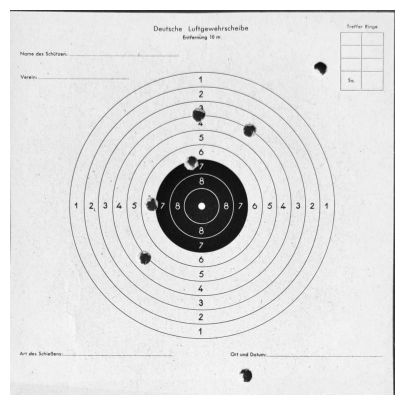

In [12]:
image = io.imread(f'resources/aligned/shot_6.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

show_image(gray_image, cmap="gray", size=(5,5))

In [4]:
def create_binary_ring(inner_radius, outer_radius):    
    template = []

    for i in range(-outer_radius, outer_radius + 1):
        row = []
        for j in range(-outer_radius, outer_radius + 1):
            distance = (i ** 2 + j ** 2) ** 0.5
            if inner_radius <= distance <= outer_radius:
                row.append(1)
            else:
                row.append(0)
        template.append(row)

    return template

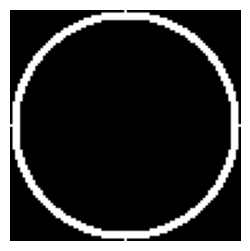

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


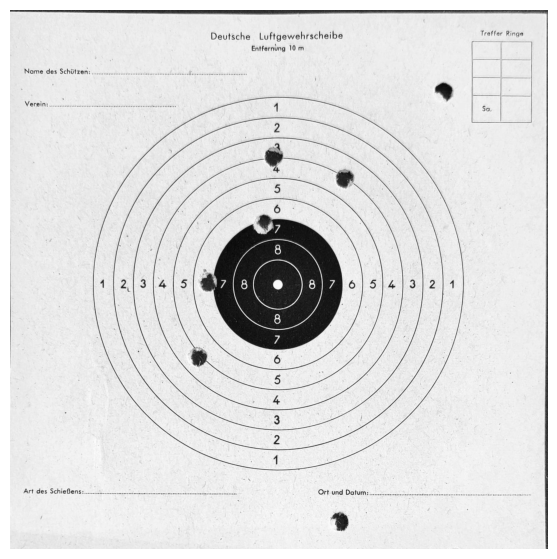

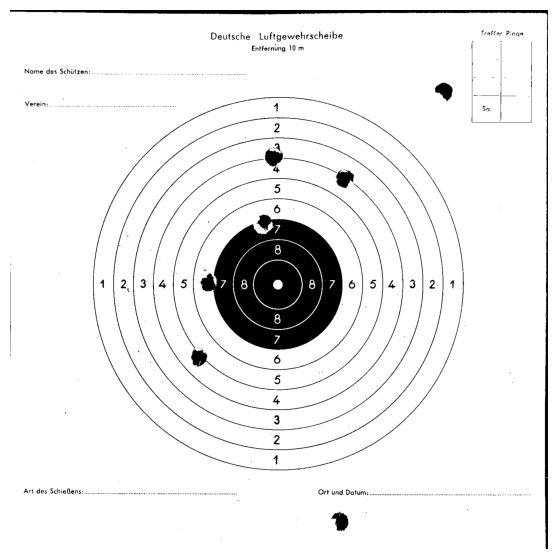

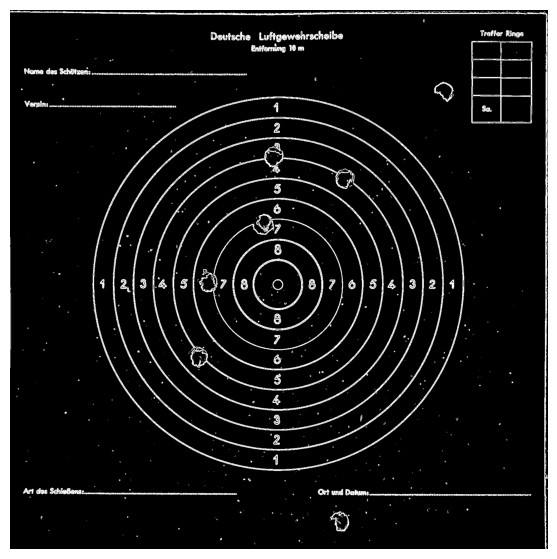

In [5]:
ring_template = create_binary_ring(42, 45)
show_image(ring_template, cmap='gray')
_, binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

binary = binary / 255  # Normalize the binary image to have a range between 0 and 1
binary = binary.astype(np.uint8) # Convert the binary image to uint8

print(binary)
show_image(gray_image, cmap='gray', size=(7,7))
show_image(binary, cmap='gray', size=(7,7))

# canny = cv2.Canny(image=gray_image, threshold1=35, threshold2=200)

sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# Normalize and threshold the result
sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
threshold = 40
sobel[sobel < threshold] = 0
sobel[sobel >= threshold] = 255
# canny = io.imread('resources/aligned/test.png')
# canny = cv2.cvtColor(canny, cv2.COLOR_BGR2GRAY)
show_image(sobel, cmap='gray', size=(7,7))

In [18]:
print(ring_template)
template_2 = cv2.imread('resources/shots/gray_hole.jpg', cv2.IMREAD_GRAYSCALE)
ring_template_uint8 = np.array(ring_template, dtype=np.uint8)
template_2 = np.array(template_2, dtype=np.uint8)
result_binary_template_2 = cv2.matchTemplate(binary, template_2, cv2.TM_CCORR_NORMED)
show_image(result_binary_template_2, cmap='gray', size=(7,7))


result_binary_gray = cv2.matchTemplate(gray_image, ring_template_uint8, cv2.TM_CCORR_NORMED)
show_image(result_binary_gray, cmap='gray', size=(7,7))

result_binary = cv2.matchTemplate(binary, ring_template_uint8, cv2.TM_CCORR_NORMED)
result_sobel = cv2.matchTemplate(binary, ring_template_uint8, cv2.TM_CCORR_NORMED)

result_binary = correlate2d(binary, ring_template, mode='same')
# y, x = np.unravel_index(np.argmax(result), result.shape)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.imshow(gray_image, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(result_binary, cmap='gray')
ax2.set_title('Correlation Result Binary')
ax2.autoscale(False)
# ax2.plot(x, y, 'ro')
ax3.imshow(result_sobel, cmap='gray')
ax3.set_title('Correlation Result Sobel')
plt.show()

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

error: OpenCV(4.6.0) C:\ci_311_rebuilds\opencv-suite_1679001454889\work\modules\imgproc\src\templmatch.cpp:588: error: (-215:Assertion failed) corr.rows <= img.rows + templ.rows - 1 && corr.cols <= img.cols + templ.cols - 1 in function 'cv::crossCorr'


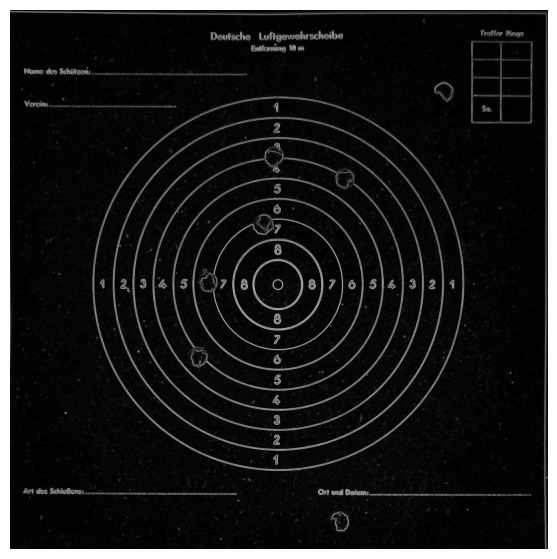

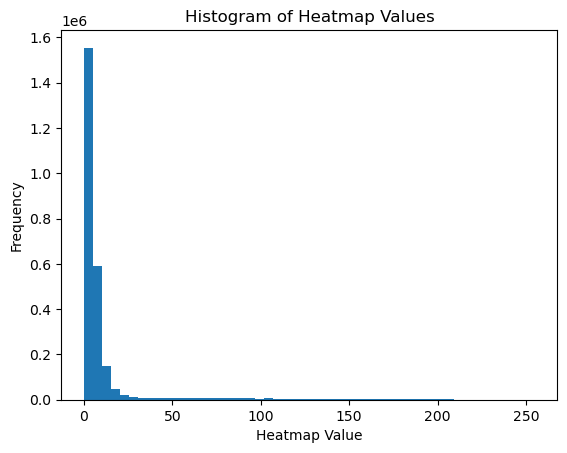

786


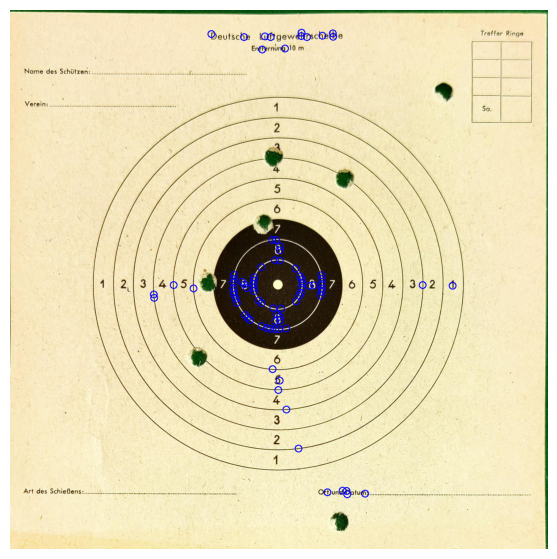

In [14]:
heatmap = cv2.normalize(result_sobel, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
show_image(heatmap, cmap='gray', size=(7,7))
hist, bins = np.histogram(heatmap.flatten(), bins=50)

# Plot the histogram
plt.hist(heatmap.flatten(), bins=50)
plt.xlabel('Heatmap Value')
plt.ylabel('Frequency')
plt.title('Histogram of Heatmap Values')
plt.show()
heatmap = median_filter(heatmap, size=3)
heatmap = gaussian_filter(heatmap, sigma=1)

threshold = 0.8
peaks = np.argwhere(heatmap >= threshold * np.max(heatmap))
print(len(peaks))
# Filter out the peaks that are too close to each other
filtered_peaks = []
for peak in peaks:
    if all(np.linalg.norm(np.array(peak) - np.array(filtered_peak)) > 10 for filtered_peak in filtered_peaks):
        filtered_peaks.append(peak)

# Draw circles around the filtered peaks
for peak in filtered_peaks:
    cv2.circle(image, tuple(peak[::-1]), 10, (0, 0, 255), 2)

show_image(image, size=(7,7))